In [6]:
import os, sys
from PIL import Image
size = 128, 128

try:
    im = Image.open("./image.jpeg")
    im.thumbnail(size, Image.LANCZOS)
    im.save("image_thumb", "JPEG")
except IOError:
    pass    

In [11]:
from PIL import Image, ImageEnhance

ImageEnhanceim = Image.open("./image.jpeg")
im_out = ImageEnhance.Sharpness(im).enhance(3)
im_out.save('image_color_enhance.jpg')

In [22]:
from PIL import Image, ImageOps
img = Image.open('./image.jpeg')
img_with_border = ImageOps.expand(img,border=5,fill='red')
img_with_border.save('./image_border_white.jpeg', quality=90)

In [24]:
# 1. Image pasting size should be static or adaptive
# 2. In case of pasting what if image size is larger then background image
# 3. Do we need to set, pasting image height and width in englis.json/arabic.json files or in code
# 4. What if image is not print ready having not good quality?.

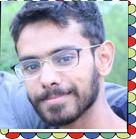

In [195]:
from PIL import Image, ImageOps
kid_photo = Image.open('./image_thumb')
frame = Image.open('./frame.png')

offset_x = frame.size[0]
offset_y = frame.size[1]

ofx = int( (offset_x*.1)//100 )
ofy = int( (offset_y*.2)//100 )

w = kid_photo.size[0] + int( (offset_x*2)//100 )
h = kid_photo.size[1] + int( (offset_y*2)//100 )
frame = frame.resize( (w, h), Image.ANTIALIAS )
frame.paste( kid_photo, (ofx, ofy) )
frame

x padding: 4
y padding: 5
H: 341
W: 504


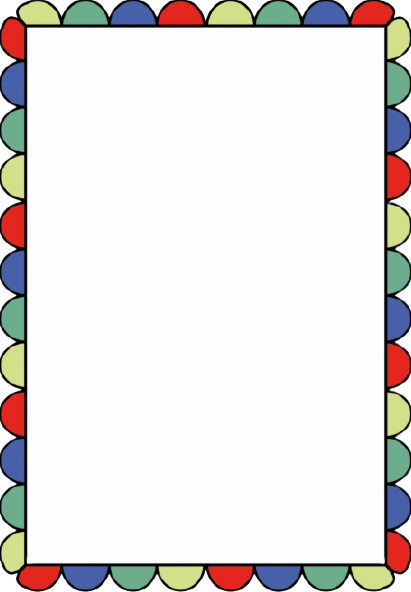

In [219]:
from PIL import Image, ImageOps
kid_photo = Image.open('./kid_photo.webp')
frame = Image.open('./frame.png')

wframe = frame.size[0]
hframe = frame.size[1]

wkid_photo = kid_photo.size[0]
hkid_photo = kid_photo.size[1]

x_padding = int( (wframe*.01) )
y_padding = int( (hframe*.01))

print("x padding:", x_padding)
print("y padding:", y_padding)

w = wkid_photo +  x_padding
h = hkid_photo + y_padding

print("H:", h)
print("W:", w)

frame.resize( (w, h), Image.ANTIALIAS )

#frame.paste( kid_photo, (x_padding, y_padding) )

frame

In [216]:
frame.size

(411, 592)

In [217]:
kid_photo.size

(500, 336)

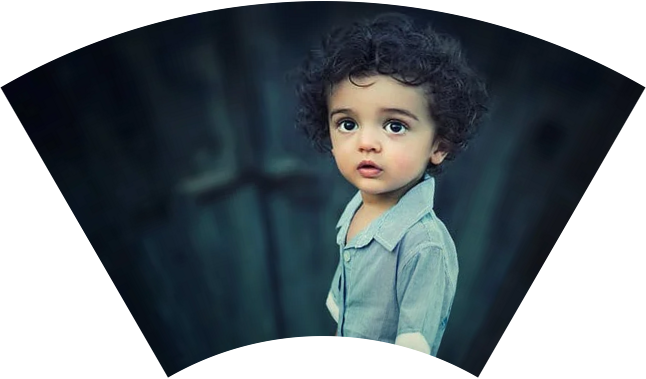

In [152]:
from wand.image import Image as Image_Wand

img =  Image_Wand(filename='kid_photo.webp')
img.virtual_pixel = 'transparent'
img.distort('arc', (60, ))
img

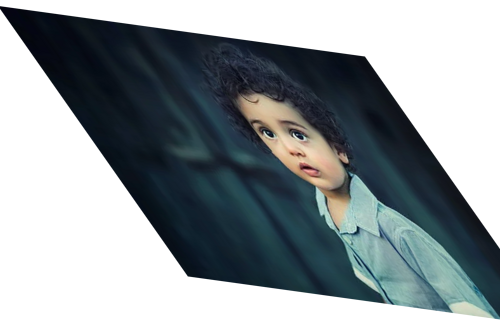

In [120]:
from wand.image import Image as Image_Wand

img =  Image_Wand(filename='kid_photo.webp')
img.virtual_pixel = 'transparent'

args = (
    10, 10, 11, 15,  # Point 1: (10, 10) => (15,  15)
    139, 0, 100, 20, # Point 2: (139, 0) => (100, 20)
    0, 92, 50, 80    # Point 3: (0,  92) => (50,  80)
)

img.distort('affine', args )
img

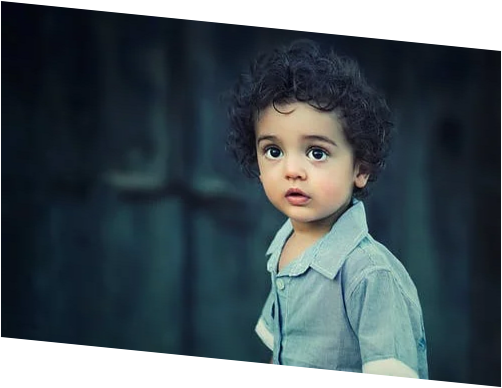

In [150]:
from collections import namedtuple
from wand.color import Color
from wand.image import Image

Point = namedtuple('Point', ['x', 'y'])

img = Image(filename='./kid_photo.webp')
    
img.virtual_pixel = 'transparent'
rotate = Point(0., 0)
scale = Point(1, 1)
translate = Point(0, 0)
args = (
    scale.x, rotate.x, rotate.y,
    scale.y, translate.x, translate.y
)
img.distort('affine_projection', args, best_fit=True)
img

In [157]:
from wand.image import Image
from wand.display import display

img = Image(filename='./kid_photo.webp')
for r in 1, 2, 3:
    with img.clone() as i:
        i.resize(int(i.width * r * 0.25), int(i.height * r * 0.25))
        i.rotate(90 * r)
        i.save(filename='mona-lisa-{0}.png'.format(r))
        i